# <u> DATA SCIENCE PROJECT</u>:

## Predicting Business Survival Rate based on London Borough

## PART 1 - Data Preparation Notebook: Data acquisition, preparation, transformation for "Exploratory Analysis" and "Modelling"

<ul><li>Section 1 - Webscrape Wikipedia</li>
<li>Section 2 - Obtain business survival rate</li>
<li>Section 3 - Obtain crime data</li>
<li>Section 4 - Obtain geospatial data</li>
<li>Section 5 - Obtain venue data</li>
<li>Section 6 - Creating Data for Modelling</li></ul>

### Section 1 - Webscrape Wikipedia

First section of the notebook runs through the process of web-scraping the London Borough information from Wikipedia. BeautifulSoup is imported to help with the extraction.

In [1]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import numpy as np
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://en.wikipedia.org/wiki/London_boroughs'
ldn_data = requests.get(url).text
ldn_soup = BeautifulSoup(ldn_data, "html5lib")

#Separate out element <td> as this contains all relevant information
ldn_table = ldn_soup.find_all('table', {'class':'wikitable'})

#View html to gauge layout of the information - comment out if required
ldn_table_tr = ldn_table[0].find_all('tr')
del ldn_table_tr[0]
#ldn_table_tr

[<tr>
 <td><a href="/wiki/London_Borough_of_Camden" title="London Borough of Camden">Camden</a>
 </td>
 <td>Inner
 </td>
 <td><a href="/wiki/Metropolitan_Borough_of_Hampstead" title="Metropolitan Borough of Hampstead">Hampstead</a> (11a)</td>
 <td><a href="/wiki/Metropolitan_Borough_of_St_Pancras" title="Metropolitan Borough of St Pancras">St Pancras</a> (11b)</td>
 <td><a href="/wiki/Metropolitan_Borough_of_Holborn" title="Metropolitan Borough of Holborn">Holborn</a> (11c)</td>
 <td></td>
 <td>
 </td></tr>,
 <tr>
 <td><a href="/wiki/Royal_Borough_of_Greenwich" title="Royal Borough of Greenwich">Greenwich</a>
 </td>
 <td>Inner
 </td>
 <td><a href="/wiki/Metropolitan_Borough_of_Greenwich" title="Metropolitan Borough of Greenwich">Greenwich</a> (22a)</td>
 <td><a href="/wiki/Metropolitan_Borough_of_Woolwich" title="Metropolitan Borough of Woolwich">Woolwich</a> (part) (22b)</td>
 <td></td>
 <td></td>
 <td>
 </td></tr>,
 <tr>
 <td><a href="/wiki/London_Borough_of_Hackney" title="London Bo

In [3]:
#Create Pandas Dataframe
df_london = pd.DataFrame(columns=["Borough","Designation"])

for i in range(len(ldn_table_tr)):
    bor = ldn_table_tr[i].td.text
    bor = bor.replace('\n','')
    dsgn = ldn_table_tr[i].td.nextSibling.nextSibling.text
    dsgn = dsgn.replace('\n','')
    df_london = df_london.append({"Borough":bor, "Designation":dsgn}, ignore_index=True)

df_london.head()

,Borough,Designation
0,Camden,Inner
1,Greenwich,Inner
2,Hackney,Inner
3,Hammersmith[notes 2],Inner
4,Islington,Inner
5,Kensington and Chelsea,Inner
6,Lambeth,Inner
7,Lewisham,Inner
8,Southwark,Inner
9,Tower Hamlets,Inner


In [4]:
#Borough name clean-up : Removing [notes 2] and [notes 3]
df_london.at[3,'Borough']='Hammersmith and Fulham'
df_london.at[12, 'Borough']='Barking and Dagenham'

#Add City of London

CityOfLondon = pd.Series(data={'Borough':'City of London','Designation':'Inner'})
df_london = df_london.append(CityOfLondon, ignore_index=True)
#df_london

Manually add population to 'Main DataFrame' [START here if notebook accidentally closed]

In [3]:
#Save the csv file to input population manually from below URL
#https://www.statista.com/statistics/381055/london-population-by-borough/

#df_london.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/London.csv")
df_london = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/London.csv")
df_london.drop('Unnamed: 0', axis='columns', inplace=True)
#df_london

### Section 2 - Obtaining Business Survival Rate (GOV.UK website)

The files were saved manually into local machine and uploaded into the notebook via pandas "read_csv"

In [4]:
#Business Survival Rate obtained from:
#https://data.london.gov.uk/dataset/business-demographics-and-survival-rates-borough?resource=1cff3cf1-b4a8-4194-b0ba-42839e94b432
#To maintain relevancy, we will look at 2017 until latest (2019)
df_business = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/BusinessDemo_Clean.csv")
df_business.head()                          

,code,Borough,year,active_enterprises,births,birth_rate,deaths,death_rate
0,E09000001,City of London,2017,32990,5905,17.9,7395,22.4
1,E09000007,Camden,2017,37510,5765,15.4,5480,14.6
2,E09000011,Greenwich,2017,11640,1855,15.9,1655,14.2
3,E09000012,Hackney,2017,23535,4360,18.5,3170,13.5
4,E09000013,Hammersmith and Fulham,2017,14650,2095,14.3,1930,13.2


#### SAVE FINAL DATA for LONDON BUSINESS SURVIVAL RATE

In [5]:
#Merge df_business with df_london
df_london_business = df_london.join(df_business.set_index('Borough'), on='Borough')
df_london_business.shape
df_london_business.reset_index(drop=True, inplace=True)
df_london_business.head()

#Save Data
df_london_business.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_BUSINESS.csv")

### Section 3 - Obtaining Crime Data (Kaggle)
Source (Kaggle), downloaded from: https://www.kaggle.com/hark99/london-crime-data

For this process, I have imported a snippet of working code to run through the local machine and iteratively append the files.

In [12]:
import glob
import os

Code snippet to read and append multiple csv file into a consolidated main file:

In [19]:
path = r"/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/LONDON_CRIME_DATA"
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_crime   = pd.concat(df_from_each_file, ignore_index=True)
#df_crime.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/CONSOL_CRIME.csv")

Manual data clean up for crime data includes:
<ul><li>Removing last 4 digit code from LSOA Name field</li>
    <li>Introducing "Year" column</li></ul>
    
Reading file back into notebook (if necessary):

In [16]:
df_crime = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_CONSOL_CRIME.csv")
df_crime.head()                          

,Crime ID,Month,Year,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Borough,Crime type,Last outcome category,Context
0,6260583e3136d959b5b2b2f7a73f46500ee7dd0e6f3d96...,2020-03,2020,City of London Police,City of London Police,-0.112422,51.515381,On or near Star Yard,E01000914,Camden 028B,Camden,Other theft,Investigation complete; no suspect identified,NaN
1,2ff6f7e089bd414c91e0e3adf0f172bbc2c029a711aa6d...,2020-03,2020,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Camden,Public order,Unable to prosecute suspect,NaN
2,5916a931657687f5abcf3aa84aa09242ce38b4ac490344...,2020-03,2020,City of London Police,City of London Police,-0.113256,51.516824,On or near Old Square,E01000914,Camden 028B,Camden,Public order,Investigation complete; no suspect identified,NaN
3,dfefef6c1927b155ee3f90cfb6960cc42e331c690d33b2...,2020-03,2020,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Camden,Public order,Court result unavailable,NaN
4,eaaffe4c22a84ce97bc40657076d00ac4db37c64e2b2d6...,2020-03,2020,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Camden,Theft from the person,Investigation complete; no suspect identified,NaN


#### SAVE FINAL DATA for LONDON CRIME

In [ ]:
df_crime = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_CONSOL_CRIME.csv")

### Section 4 - Geospatial Data

The following section details the information extracted relating to geography i.e. longitude and latitude of each London Borough

In [129]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

Re-uploading the business dataframe (if necessary):

In [130]:
df_london_business = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_BUSINESS.csv")

In [131]:
address = 'Hillingdon, UK'

geolocator = Nominatim(user_agent="uk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Hillingdon, UK are 51.542519299999995, -0.44833493117949663.


In [132]:
df_borough = df_london_business.groupby('Borough').count()
df_borough.drop(columns=['Designation','Population','code','year','active_enterprises','births','deaths','birth_rate','death_rate','Unnamed: 0'], inplace=True)

In [133]:
df_borough.reset_index(inplace=True)
df_borough.head()

,Borough
0,Barking and Dagenham
1,Barnet
2,Bexley
3,Brent
4,Bromley
5,Camden
6,City of London
7,Croydon
8,Ealing
9,Enfield


In [134]:
#Create Pandas Dataframe and retrieve longitude and latitude of each of the London Borough
df_bor_latlng = pd.DataFrame(columns=["Borough","bor_latitude","bor_longitude"])

for index,row in df_borough.iterrows():
    address = '{}, UK'.format(row['Borough'])
    geolocator = Nominatim(user_agent="uk_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    
    df_bor_latlng = df_bor_latlng.append({"Borough":row['Borough'], "bor_latitude":latitude, "bor_longitude":longitude}, ignore_index=True)

The geograpical coordinate of Barking and Dagenham, UK are 51.5541171, 0.15050434261994267.
The geograpical coordinate of Barnet, UK are 51.65309, -0.2002261.
The geograpical coordinate of Bexley, UK are 51.4416793, 0.150488.
The geograpical coordinate of Brent, UK are 50.3324465, -4.5109878.
The geograpical coordinate of Bromley, UK are 51.4028046, 0.0148142.
The geograpical coordinate of Camden, UK are 51.5423045, -0.1395604.
The geograpical coordinate of City of London, UK are 51.5156177, -0.0919983.
The geograpical coordinate of Croydon, UK are 51.3713049, -0.101957.
The geograpical coordinate of Ealing, UK are 51.5126553, -0.3051952.
The geograpical coordinate of Enfield, UK are 53.4308358, -2.9609095414165294.
The geograpical coordinate of Greenwich, UK are 52.0367323, 1.168934.
The geograpical coordinate of Hackney, UK are 51.5432402, -0.0493621.
The geograpical coordinate of Hammersmith and Fulham, UK are 51.4920377, -0.2236401.
The geograpical coordinate of Haringey, UK are 51

In [135]:
#Check latitude and longitude have been added
df_bor_latlng

,Borough,bor_latitude,bor_longitude
0,Barking and Dagenham,51.554117,0.150504
1,Barnet,51.653090,-0.200226
2,Bexley,51.441679,0.150488
3,Brent,50.332447,-4.510988
4,Bromley,51.402805,0.014814
5,Camden,51.542305,-0.139560
6,City of London,51.515618,-0.091998
7,Croydon,51.371305,-0.101957
8,Ealing,51.512655,-0.305195
9,Enfield,53.430836,-2.960910


### Section 5 - Nearby Venues (Foursquare)

The following section details the information extracted relating to popular venue within 500m radius of the London Borough centre.

In [136]:
CLIENT_ID = 'S544KOFIE0XRIE4MJIAT3P5UGG0JSZDTQ2L4U31ULQDIXQQW' # your Foursquare ID
CLIENT_SECRET = 'B5Y2OLYWNZWYZUC1AGOUJGWMTVRSWPZ4V4KKC2HHHTQITBYK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: S544KOFIE0XRIE4MJIAT3P5UGG0JSZDTQ2L4U31ULQDIXQQW
CLIENT_SECRET:B5Y2OLYWNZWYZUC1AGOUJGWMTVRSWPZ4V4KKC2HHHTQITBYK


In [137]:
LIMIT = 10
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [140]:
london_venues = getNearbyVenues(names=df_bor_latlng['Borough'],
                                latitudes=df_bor_latlng['bor_latitude'],
                                longitudes=df_bor_latlng['bor_longitude'])

In [141]:
london_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub
5,Barnet,51.653090,-0.200226,Joie de Vie,51.653659,-0.201288,Bakery
6,Barnet,51.653090,-0.200226,Caffè Nero,51.654861,-0.201743,Coffee Shop
7,Barnet,51.653090,-0.200226,The Black Horse,51.653075,-0.206719,Pub
8,Barnet,51.653090,-0.200226,Waterstones,51.655368,-0.202607,Bookstore
9,Barnet,51.653090,-0.200226,Spizzico,51.656600,-0.201802,Italian Restaurant


#### SAVE FINAL DATA for LONDON VENUE

In [142]:
london_venues.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_VENUES.csv")

Visual map of the London Boroughs

In [20]:
import folium # map rendering library

In [21]:
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_bor_latlng['bor_latitude'], df_bor_latlng['bor_longitude'], df_bor_latlng['Borough']):
    label = '{}, UK'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

### SECTION 6 - Transforming and joining all datasets for Modelling [START HERE]

This section runs through the process of applying one-hot encoding and merging all data set for modelling. 

In [52]:
import pandas as pd
import numpy as np

In [157]:
df_london_business = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_BUSINESS.csv")
df_london_business = df_london_business[df_london_business.year != 2017]
df_london_business.drop(['Unnamed: 0', 'code'], axis=1, inplace=True)
df_london_business.dropna()

,Borough,Designation,Population,year,active_enterprises,births,birth_rate,deaths,death_rate
1,Camden,Inner,279516,2018,38800,6765,17.4,4655,12.0
2,Camden,Inner,279516,2019,40290,6435,16.0,5470,13.6
4,Greenwich,Inner,289034,2018,11670,1855,15.9,1475,12.6
5,Greenwich,Inner,289034,2019,12090,1955,16.2,1485,12.3
7,Hackney,Inner,280941,2018,24620,4570,18.6,3160,12.8
8,Hackney,Inner,280941,2019,26785,5060,18.9,3620,13.5
10,Hammersmith and Fulham,Inner,183544,2018,14600,2185,15.0,1795,12.3
11,Hammersmith and Fulham,Inner,183544,2019,14915,2050,13.7,1910,12.8
13,Islington,Inner,248115,2018,23365,4265,18.3,2880,12.3
14,Islington,Inner,248115,2019,25620,4865,19.0,1425,5.6


In [158]:
#BUSINESS DATASET FOR MODELLING (BEFORE JOINING WITH CRIME AND VENUE)
df_london_business.reset_index(drop=True, inplace=True)
df_london_business

,Borough,Designation,Population,year,active_enterprises,births,birth_rate,deaths,death_rate
0,Camden,Inner,279516,2018,38800,6765,17.4,4655,12.0
1,Camden,Inner,279516,2019,40290,6435,16.0,5470,13.6
2,Greenwich,Inner,289034,2018,11670,1855,15.9,1475,12.6
3,Greenwich,Inner,289034,2019,12090,1955,16.2,1485,12.3
4,Hackney,Inner,280941,2018,24620,4570,18.6,3160,12.8
5,Hackney,Inner,280941,2019,26785,5060,18.9,3620,13.5
6,Hammersmith and Fulham,Inner,183544,2018,14600,2185,15.0,1795,12.3
7,Hammersmith and Fulham,Inner,183544,2019,14915,2050,13.7,1910,12.8
8,Islington,Inner,248115,2018,23365,4265,18.3,2880,12.3
9,Islington,Inner,248115,2019,25620,4865,19.0,1425,5.6


#### Transforming CRIME DATA for MODELLING

Note: Resolved/Unresolved column was added in excel by looking at "Last outcome category" with string "Offender"

In [112]:
df_crime = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_CONSOL_CRIME.csv")
indexNames = df_crime[~(df_crime['Year'] < 2020)].index 
df_crime.drop(indexNames, inplace=True)
df_crime.drop(['Crime ID', 'Month', 'Reported by', 'Last outcome category', 'Falls within', 'LSOA code', 'LSOA name', 'Context', 'Longitude', 'Latitude', 'Location'], axis=1, inplace=True)
df_crime.dropna(axis=0, how="any", inplace=True)
df_crime.reset_index(drop=True, inplace=True)
df_crime['count']=1
df_crime

,Year,Borough,Crime type,resolved,count
0,2018,Arun,Vehicle crime,0,1
1,2018,Barking and Dagenham,Anti-social behaviour,0,1
2,2018,Barking and Dagenham,Anti-social behaviour,0,1
3,2018,Barking and Dagenham,Anti-social behaviour,0,1
4,2018,Barking and Dagenham,Anti-social behaviour,0,1
...,...,...,...,...,...
665270,2019,Hounslow,Violence and sexual offences,0,1
665271,2019,Hounslow,Other crime,0,1
665272,2019,Hounslow,Anti-social behaviour,0,1
665273,2019,Hounslow,Anti-social behaviour,0,1


In [113]:
dftest = pd.get_dummies(df_crime['Crime type'])
dfresolved = pd.get_dummies(df_crime['resolved'])
dfresolved.columns = ['unresolved','resolved']
merge1 = dftest.join(dfresolved)
merge1

,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,unresolved,resolved
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665270,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
665271,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
665272,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
665273,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [122]:
df_crime1 = df_crime.drop(['Crime type', 'resolved', 'count'], axis=1)
df_crime2 = df_crime1.join(merge1)
df_crime3 = df_crime2.groupby(['Year','Borough']).sum()

#Manual checking
#df_crime3.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime_onehot.csv")

Joining Crime Data with Business Data

In [159]:
df_crime3 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime_onehot.csv")
df_business_crime = pd.merge(df_london_business, df_crime3,  how='left', left_on=['Borough','year'], right_on = ['Borough','Year'])

In [160]:
#DATASET for MODELLING BEFORE JOINING WITH FOURSQUARE
df_business_crime

,Borough,Designation,Population,year,active_enterprises,births,birth_rate,deaths,death_rate,Year,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,unresolved,resolved,resolved_rate
0,Camden,Inner,279516,2018,38800,6765,17.4,4655,12.0,2018,3009,457,1161,525,403,62,2580,61,573,608,542,1380,1069,2379,14494,315,2.17
1,Camden,Inner,279516,2019,40290,6435,16.0,5470,13.6,2019,2999,368,1118,562,557,74,2980,65,585,581,548,1443,1192,2130,14969,233,1.56
2,Greenwich,Inner,289034,2018,11670,1855,15.9,1475,12.6,2018,1856,121,894,733,237,114,1011,60,506,262,500,184,1219,2851,10266,282,2.75
3,Greenwich,Inner,289034,2019,12090,1955,16.2,1485,12.3,2019,1967,94,872,683,316,116,912,63,501,251,495,189,1399,2512,10206,164,1.61
4,Hackney,Inner,280941,2018,24620,4570,18.6,3160,12.8,2018,2654,583,1159,609,483,99,1445,97,571,573,274,799,1180,2812,12931,407,3.15
5,Hackney,Inner,280941,2019,26785,5060,18.9,3620,13.5,2019,2653,415,1049,574,471,82,1455,90,570,619,277,941,1121,2572,12629,260,2.06
6,Hammersmith and Fulham,Inner,183544,2018,14600,2185,15.0,1795,12.3,2018,1794,367,650,409,292,63,1113,44,477,277,457,245,923,1823,8696,238,2.74
7,Hammersmith and Fulham,Inner,183544,2019,14915,2050,13.7,1910,12.8,2019,1732,298,615,450,293,72,1034,49,461,231,437,307,986,1727,8534,158,1.85
8,Islington,Inner,248115,2018,23365,4265,18.3,2880,12.3,2018,2100,338,917,585,408,98,1458,68,573,494,433,896,981,2342,11398,293,2.57
9,Islington,Inner,248115,2019,25620,4865,19.0,1425,5.6,2019,1780,223,739,374,292,75,1304,63,418,390,348,697,695,1647,8893,152,1.71


#### Transforming VENUE DATA for MODELLING

In [143]:
df_london_venue = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_VENUES.csv")
df_london_venue.drop(['Unnamed: 0', 'Borough Latitude', 'Venue', 'Borough Longitude', 'Venue Latitude', 'Venue Longitude'], axis=1, inplace=True)
df_london_venue.reset_index(drop=True, inplace=True)
dfvenue = pd.get_dummies(df_london_venue['Venue Category'])
dfvenue

,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Canal,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Eastern European Restaurant,Electronics Store,Event Space,Farm,Fast Food Restaurant,Fish Market,Flea Market,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gelato Shop,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Record Shop,Restaurant,Roof Deck,Salad Place,Scenic Lookout,Skate Park,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Tram Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [151]:
dfvenue1 = df_london_venue.join(dfvenue)
dfvenue1.drop(['Venue Category'], axis=1, inplace=True)
dfvenue2 = dfvenue1.groupby(['Borough']).sum()
dfvenue2.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/onehot_venue.csv")

In [161]:
dfvenue2 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/onehot_venue.csv")
df_final = df_business_crime.join(dfvenue2.set_index('Borough'), on='Borough')
df_final.shape

,Borough,Designation,Population,year,active_enterprises,births,birth_rate,deaths,death_rate,Year,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,unresolved,resolved,resolved_rate,Afghan Restaurant,African Restaurant,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Store,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Bus Stop,Café,Cajun / Creole Restaurant,Canal,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Creperie,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Eastern European Restaurant,Electronics Store,Event Space,Farm,Fast Food Restaurant,Fish Market,Flea Market,Food Truck,French Restaurant,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gelato Shop,German Restaurant,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kitchen Supply Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Store,Organic Grocery,Outdoor Sculpture,Park,Performing Arts Venue,Pharmacy,Pizza Place,Plaza,Polish Restaurant,Portuguese Restaurant,Pub,Record Shop,Restaurant,Roof Deck,Salad Place,Scenic Lookout,Skate Park,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Trail,Train Station,Tram Station,Travel & Transport,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yoga Studio
0,Camden,Inner,279516,2018,38800,6765,17.4,4655,12.0,2018,3009,457,1161,525,403,62,2580,61,573,608,542,1380,1069,2379,14494,315,2.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Camden,Inner,279516,2019,40290,6435,16.0,5470,13.6,2019,2999,368,1118,562,557,74,2980,65,585,581,548,1443,1192,2130,14969,233,1.56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Greenwich,Inner,289034,2018,11670,1855,15.9,1475,12.6,2018,1856,121,894,733,237,114,1011,60,506,262,500,184,1219,2851,10266,282,2.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Greenwich,Inner,289034,2019,12090,1955,16.2,1485,12.3,2019,1967,94,872,683,316,116,912,63,501,251,495,189,1399,2512,10206,164,1.61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hackney,Inner,280941,2018,24620,4570,18.6,3160,12.8,2018,2654,583,1159,609,483,99,1445,97,571,573,274,799,1180,2812,12931,407,3.15,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Hackney,Inner,280941,2019,26785,5060,18.9,3620,13.5,2019,2653,415,1049,574,471,82,1455,90,570,619,277,941,1121,2572,12629,260,2.06,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

#### FINAL DATA for MODELLING

In [163]:
df_final.reset_index(inplace=True,drop=True)
df_final.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_MODEL_DATA.csv")

 <center>-----------------------------------END PART 1----------------------------------------


## PART 2 - Exploratory Analysis

<ul><li>Section 1 - Analysing business volume</li>
<li>Section 2 - Analysing venue type</li>
<li>Section 3 - Analysing crime type</li><ul>

In [44]:
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

## P2: Section 1 - Analysing business volume by London Borough

In [4]:
df_london_business = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_BUSINESS.csv")
#df_london_business = df_london_business[df_london_business.year != 2017]
df_london_business.drop(['Unnamed: 0', 'code'], axis=1, inplace=True)
df_london_business['survival_rate'] = 100 - df_london_business['death_rate']
df_london_business.reset_index(drop=True, inplace=True)
df_london_business

,Borough,Designation,Population,year,active_enterprises,births,birth_rate,deaths,death_rate,survive,survival_rate
0,Camden,Inner,279516,2017,37510,5765,15.4,5480,14.6,0,85.4
1,Camden,Inner,279516,2018,38800,6765,17.4,4655,12.0,1,88.0
2,Camden,Inner,279516,2019,40290,6435,16.0,5470,13.6,1,86.4
3,Greenwich,Inner,289034,2017,11640,1855,15.9,1655,14.2,0,85.8
4,Greenwich,Inner,289034,2018,11670,1855,15.9,1475,12.6,1,87.4
5,Greenwich,Inner,289034,2019,12090,1955,16.2,1485,12.3,1,87.7
6,Hackney,Inner,280941,2017,23535,4360,18.5,3170,13.5,1,86.5
7,Hackney,Inner,280941,2018,24620,4570,18.6,3160,12.8,1,87.2
8,Hackney,Inner,280941,2019,26785,5060,18.9,3620,13.5,1,86.5
9,Hammersmith and Fulham,Inner,183544,2017,14650,2095,14.3,1930,13.2,1,86.8


In [5]:
pd.pivot_table(df_london_business, index='Borough', 
               columns='year', 
               values=['active_enterprises','birth_rate'], 
               margins=False)

active_enterprises               birth_rate            
year                                 2017   2018   2019       2017  2018  2019
Borough                                                                       
Barking and Dagenham                 7980   8100   8515       17.5  18.8  19.1
Barnet                              29845  29225  29815       14.6  14.8  16.3
Bexley                              10300  10115  10385       13.7  12.9  15.2
Brent                               17505  18465  18605       15.3  19.1  16.4
Bromley                             17780  17845  17805       15.2  13.4  12.4
Camden                              37510  38800  40290       15.4  17.4  16.0
City of London                      32990  31440  31550       17.9  18.7  16.5
Croydon                             17285  17380  17625       14.3  14.4  14.0
Ealing                              20690  20700  20885       15.1  14.3  14.1
Enfield                             15560  15655  16100       14.6  15.1  16.3
Greenwich                           11640  11670  12090       15.9  15.9  16.2
Hackney                             23535  24620  26785       18.5  18.6  18.9
Hammersmith and Fulham              14650  14600  14915       14.3  15.0  13.7
Haringey                            14130  14210  14960       15.2  16.0  16.6
Harrow                              17275  17540  18230       14.0  14.7  14.8
Havering                            11305  11380  11960       13.6  13.7  17.0
Hillingdon                          15085  15560  16025       14.0  16.1  15.4
Hounslow                            15195  15030  15575       14.0  13.9  15.3
Islington                           22295  23365  25620       16.6  18.3  19.0
Kensington and Chelsea              15245  15360  16145       13.7  14.0  13.6
Kingston upon Thames                 9825  10335  10195       13.2  16.7  13.1
Lambeth                             16940  16225  16650       15.2  14.7  14.9
Lewisham                            11605  11535  11920       15.9  15.8  15.9
Merton                              13110  12905  13220       14.6  13.4  14.1
Newham                              14570  15235  16145       19.7  19.5  20.5
Redbridge                           16635  16750  17370       16.1  16.4  16.9
Richmond upon Thames                15105  15115  15545       12.5  12.0  12.3
Southwark                           19370  19275  19785       14.3  14.3  14.8
Sutton                               9570   9660  10050       12.3  12.5  14.3
Tower Hamlets                       20545  20795  21325       16.4  16.7  16.4
Waltham Forest                      12755  13560  13990       16.4  20.2  18.7
Wandsworth                          20095  19890  20020       15.1  14.8  14.8
Westminster                         59945  60520  63980       13.8  15.5  14.3

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


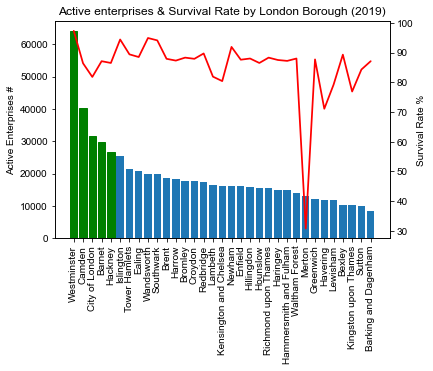

In [6]:
df_table = df_london_business.loc[df_london_business['year']==2019]
df_table.sort_values(by=['active_enterprises'], ascending=False, inplace=True)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

X = df_table['Borough']
Y1 = df_table['active_enterprises']
Y2 = df_table['survival_rate']

plt.title("Active enterprises & Survival Rate by London Borough (2019)")

#Bar graph - Volume of Enterprises
barlist=ax1.bar(X,Y1)
plt.style.use('seaborn')
ax1.set_ylabel("Active Enterprises #")
ax1.tick_params(axis='x', rotation=90)
barlist[0].set_color('g')
barlist[1].set_color('g')
barlist[2].set_color('g')
barlist[3].set_color('g')
barlist[4].set_color('g')

#Survival Rate

ax2.plot(X,Y2, color='red')
ax2.set_ylabel("Survival Rate %")

plt.show()

## P2: Section 2 - Analysing Popular Venue Type by survival rate

In [14]:
df_london_venue = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_LDN_VENUES.csv")
df_london_venue.drop(['Unnamed: 0'], axis=1, inplace=True)
df_london_venue['count'] = 1
df_london_venue.reset_index(drop=True, inplace=True)
df_london_venue

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,count
0,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store,1
1,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop,1
2,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop,1
3,Barking and Dagenham,51.554117,0.150504,Five Elms Off Licence,51.553878,0.145531,Liquor Store,1
4,Barnet,51.653090,-0.200226,Ye Old Mitre Inne,51.652940,-0.199507,Pub,1
5,Barnet,51.653090,-0.200226,Joie de Vie,51.653659,-0.201288,Bakery,1
6,Barnet,51.653090,-0.200226,Caffè Nero,51.654861,-0.201743,Coffee Shop,1
7,Barnet,51.653090,-0.200226,The Black Horse,51.653075,-0.206719,Pub,1
8,Barnet,51.653090,-0.200226,Waterstones,51.655368,-0.202607,Bookstore,1
9,Barnet,51.653090,-0.200226,Spizzico,51.656600,-0.201802,Italian Restaurant,1


In [49]:
#borough =['Westminster', 'Camden', 'Barnet', 'City of London', 'Hackney']
df_venue = df_london_venue[['Borough', 'Venue Category','count']]
#df_venue = df_venue.loc[df_venue['Borough'].isin(borough)]
df_venue.reset_index(drop=True, inplace=True)
df_venue

,Borough,Venue Category,count
0,Barking and Dagenham,Grocery Store,1
1,Barking and Dagenham,Bus Stop,1
2,Barking and Dagenham,Bus Stop,1
3,Barking and Dagenham,Liquor Store,1
4,Barnet,Pub,1
5,Barnet,Bakery,1
6,Barnet,Coffee Shop,1
7,Barnet,Pub,1
8,Barnet,Bookstore,1
9,Barnet,Italian Restaurant,1


In [50]:
df_venue.groupby(['Borough', 'Venue Category']).sum().to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/summary_venue.csv")
df_london_business.groupby(['Borough']).survival_rate.mean().to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/summary_survival_2017_2019.csv")

In [51]:
df_venue = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/summary_venue.csv")
df_business_survive = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/summary_survival_2017_2019.csv")
df_venue_survive = df_business_survive.join(df_venue.set_index('Borough'), on='Borough')

Tabularised the value of count and average survival rate by venue type. Outcome is placed into excel for graphs.

In [52]:
venue = pd.pivot_table(df_venue_survive, 
               index=['Venue Category'],
               aggfunc={'count':'sum','survival_rate':'mean' })

venue.sort_values(by=['count'], ascending=False, inplace=True)
venue

,count,survival_rate
Venue Category,,
Pub,33,86.012281
Coffee Shop,19,87.011111
Café,17,86.476923
Italian Restaurant,8,86.755556
Hotel,6,85.108333
Grocery Store,6,85.477778
Park,6,87.193333
Burger Joint,5,88.306667
Bakery,5,86.986667


## P2: Section 3 - Analysing Crime by Survival Rate

In [66]:
df_business_survive2 = df_london_business[['Borough', 'survival_rate', 'year']]
df_crime2 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_CONSOL_CRIME.csv")

In [68]:
df_crime2.drop(['Crime ID','Month','Reported by','Falls within',
               'Longitude','Latitude','Location','LSOA name','LSOA code',
               'Last outcome category','Context'], axis=1, inplace=True)
df_crime2['count'] = 1
df_crime2.shape

(1038739, 5)

In [69]:
df_business_crime = pd.merge(df_business_survive2, df_crime2,  how='left', left_on=['Borough','year'], right_on = ['Borough','Year'])

In [72]:
df_business_crime = df_business_crime[df_business_crime.year != 2017]
df_business_crime.drop(['Year'],axis=1,inplace=True)
df_business_crime.head()

,Borough,survival_rate,year,Crime type,resolved,count
1,Camden,88.0,2018,Anti-social behaviour,0.0,1.0
2,Camden,88.0,2018,Drugs,0.0,1.0
3,Camden,88.0,2018,Robbery,0.0,1.0
4,Camden,88.0,2018,Theft from the person,0.0,1.0
5,Camden,88.0,2018,Vehicle crime,0.0,1.0


Creating three separate dataframe for analysis:

<ul><li>Overall crime
<li>Resolved crime
<li>Unresolved crime</ul>

In [92]:
#Overall survival rate by resolved or non-resolved
crime1 = df_business_crime.pivot_table( 
               index=['Crime type'],
               aggfunc={'count':'sum','survival_rate':'mean' })
crime1.sort_values(by=['count'], ascending=False, inplace=True)


#Overall survival rate by resolved
crime2 = df_business_crime[df_crime.resolved==0].pivot_table( 
               index=['Crime type'],
               aggfunc={'count':'sum','survival_rate':'mean' })
crime2.sort_values(by=['count'], ascending=False, inplace=True)


#Overall survival rate by non-resolved
crime3 = df_business_crime[df_crime.resolved==1].pivot_table( 
               index=['Crime type'],
               aggfunc={'count':'sum','survival_rate':'mean' })
crime3.sort_values(by=['count'], ascending=False, inplace=True)

crime1.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime1.csv")
crime2.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime2.csv")
crime3.to_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime3.csv")

/var/folders/zy/3h4nt0m17m7198gz7cbf_c140000gn/T/ipykernel_6777/3046573163.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime2 = df_business_crime[df_crime.resolved==0].pivot_table(
/var/folders/zy/3h4nt0m17m7198gz7cbf_c140000gn/T/ipykernel_6777/3046573163.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  crime3 = df_business_crime[df_crime.resolved==1].pivot_table(


Creating a function to display graphs for each of the crime dataframe.

In [99]:
def make_graph(table,title):

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    X = table['Crime type']
    Y1 = table['count']
    Y2 = table['survival_rate']

    plt.title(f"{title} : Crime & Survival Rate (2018-2019)")

    #Bar graph - Volume of Enterprises
    barlist=ax1.bar(X,Y1)
    plt.style.use('seaborn')
    ax1.set_ylabel("Crime #")
    ax1.tick_params(axis='x', rotation=90)
    barlist[0].set_color('g')
    barlist[1].set_color('g')
    barlist[2].set_color('g')
    barlist[3].set_color('g')
    barlist[4].set_color('g')

    #Survival Rate

    ax2.plot(X,Y2, color='red')
    ax2.set_ylabel("Survival Rate %")
    ax2.set_ylim([85,95])

    plt.show()

Re-upload dataframe to add "Crime type" column back into the df. Called make_graph function for each df.

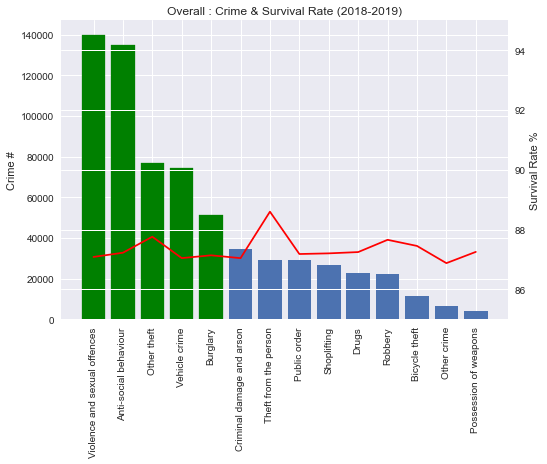

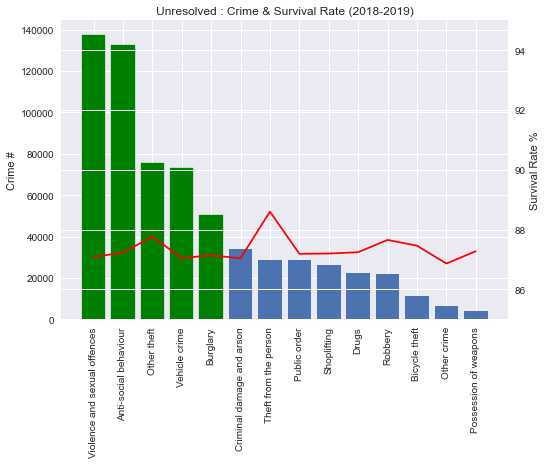

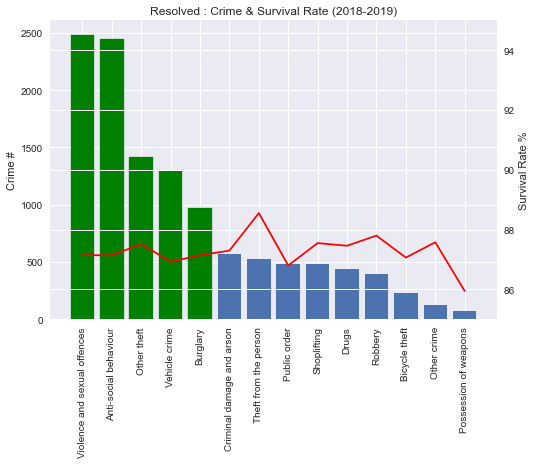

In [101]:
crime1 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime1.csv")
crime2 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime2.csv")
crime3 = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/crime3.csv")

make_graph(crime1,"Overall")
make_graph(crime2,"Unresolved")
make_graph(crime3,"Resolved")

 <center>-----------------------------------END PART 2----------------------------------------

## PART 3 - Modelling and Prediction

<ul><li>Section 1 - Regression Model, Prediction and Evaluation</li>
<li>Section 2 - Classification Model, Prediction and Evaluation</li></ul>

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score

Re-upload final data prepared from <b>01_Data Preparation.ipynb</b>

In [4]:
df = pd.read_csv("/Users/dewipori/Documents/Python/IBMDataScience/CapstoneProject/DATA/FINAL_DATA/FINAL_MODEL_DATA.csv")
df.drop(['Unnamed: 0', 'Borough', 'Designation','year','Designation_num','Population','Borough_num'], axis=1, inplace=True)
df['survival_rate'] = 100 - df['death_rate']
df.shape

(66, 135)

Prepare variables for modelling:

In [5]:
#Preparing X variables
df_x = df.drop(['survival_rate','death_rate','survive'],axis=1)
X = np.asarray(df_x)
X = preprocessing.StandardScaler().fit(X).transform(X)

#Preparing Y variables
df_y = df['survival_rate']
Y = np.asarray(df_y)

#Split into train-test
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (59, 132) (59,)
Test set: (7, 132) (7,)


## P3: Section 1 - Regression Model: Multiple Linear Regression

Prediction Model:

In [6]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, Y_train)
y_hat= regr.predict(X_test)
# The coefficients
# print ('Coefficients: ', regr.coef_)

Evaluate Model:

In [8]:
from sklearn.metrics import mean_squared_error

print("Residual sum of squares: %.2f"
      % np.mean((y_hat - Y_test) ** 2))


print("Mean squared error: %.2f"
      % regr.score(X,Y))

# Explained variance score: 1 is perfect prediction
print('Variance score, i.e. R-Square: %.5f' % regr.score(X, Y))

Residual sum of squares: 138.33
Mean squared error: 0.76
Variance score, i.e. R-Square: 0.75904


Visualise result: Predicted value by Actual value scatterplot</li>

In [36]:
import matplotlib.pyplot as plt

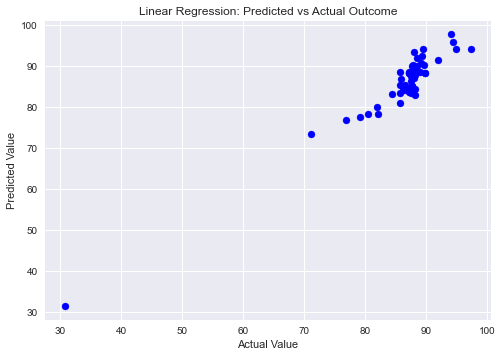

In [38]:
regr.fit (X, Y)
y_hat= regr.predict(X_train)
plt.style.use('seaborn')
plt.scatter(Y_train, y_hat,  color='blue')
plt.title("Linear Regression: Predicted vs Actual Outcome")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

## P3: Section 2 - Classification Model: Logistic Regression

Variable Prepration & Prediction Model:

In [53]:
from sklearn.linear_model import LogisticRegression

#Preparing X variables
df_x_LR = df.drop(['survival_rate','death_rate','survive'],axis=1)
X_LR = np.asarray(df_x_LR)
X_LR = preprocessing.StandardScaler().fit(X_LR).transform(X_LR)

#Preparing Y variables
df_y_LR = df['survive']
Y_LR = np.asarray(df_y_LR)

#Due to limited data, it is not recommended to split by train and test
#Split into train-test
X_trainLR, X_testLR, Y_trainLR, Y_testLR = train_test_split( X_LR, Y_LR, test_size=0.3, random_state=4)
print ('Train set:', X_trainLR.shape,  Y_trainLR.shape)
print ('Test set:', X_testLR.shape,  Y_testLR.shape)


LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainLR,Y_trainLR)
yhatLR = LR.predict(X_testLR)
yhat_probLR = LR.predict_proba(X_testLR)

Train set: (46, 132) (46,)
Test set: (20, 132) (20,)


Evaluate Model:

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss

print(confusion_matrix(Y_testLR, yhatLR, labels=[1,0]))
print(jaccard_score(Y_testLR, yhatLR,pos_label=0))
print(log_loss(Y_testLR, yhat_probLR))

[[7 8]
 [1 4]]
0.3076923076923077
0.6816840144632687


Visualise result: Creating a function to make grid graph of the Confusion Matrix

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize='xx-large')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_testLR, yhatLR, labels=[1,0]))

[[7 8]
 [1 4]]


Confusion matrix, without normalization
[[7 8]
 [1 4]]


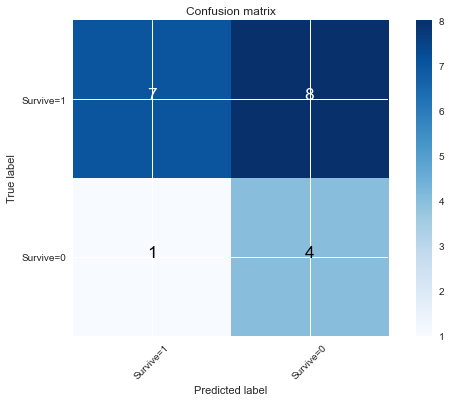

In [47]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_testLR, yhatLR,  labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Survive=1','Survive=0'],normalize= False,  title='Confusion matrix')